In [ ]:
# In this script we want to solve the system of odes for assembling two 3-membered rings  
# with synthesis and degradation NOT included 
# Name: Leo Lagunes and Paige M.
# Date: 07/14/21 

# Last update: 04/26/22

# IMPORTANT NOTE: The equations were written and developed by Drs. Eric Deeds and Koan Briggs, this code was developed by LL + PM

# Running in python because Julia hasn't really been working just yet


In [1]:
# ---------------------------------------------------
# --- packages to use ---
# ---------------------------------------------------

# First we need to import all of the packages we will be using!\n",
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import math
from scipy.integrate import solve_ivp
import seaborn as sns # for the heatmaps
from datetime import date # to print date
from datetime import datetime
from matplotlib.ticker import LogLocator
import matplotlib

print('All packages loaded!')

All packages loaded!


In [2]:
# ---------------------------------------------------
# --- LIST OF FUNCTIONS ---
# ---------------------------------------------------

# All functions necessary are in this cell

# ---------------------------------------------------    
# --- Keff function ---
# ---------------------------------------------------
def keff(i,j):
    # calculate the k_effective value given the i,j indices and the kd's (binding affinities)
    ℯ = math.e
    #kd1 = kds[0]; kd2 = kds[1]
    keff= kOn*(kd1**i)*(kd2**j)*ℯ**(-(i+j-1)*9/0.6)
    
    return keff

# ---------------------------------------------------
# --- EJD Eqns for stacked trimer ---   
# ---------------------------------------------------
def stackedTrimer(states, t):
    #x0Val = paramvaluesList[0] # initial condition for x1 
    x = states
    # list of ode's
    dx_0 = - 2*kOn*0.5*x[0]*x[0] + 1*keff(1,0)*x[1] - 2*kOn*0.5*x[0]*x[0] + 1*keff(1,0)*x[1] - 1*kOn*0.5*x[0]*x[0] + 1*keff(0,1)*x[2] - 1*kOn*0.5*x[0]*x[0] + 1*keff(0,1)*x[2] - 1*kOn*1*x[0]*x[1] + 3*keff(2,0)*x[3] - 1*kOn*1*x[0]*x[1] + 1*keff(0,1)*x[4] - 1*kOn*1*x[0]*x[1] + 1*keff(0,1)*x[5] - 2*kOn*1*x[0]*x[2] + 1*keff(1,0)*x[5] - 2*kOn*1*x[0]*x[2] + 1*keff(1,0)*x[4] - 3*kOn*1*x[0]*x[3] + 1*keff(0,1)*x[6] - 1*kOn*1*x[0]*x[4] + 1*keff(2,0)*x[6] - 1*kOn*1*x[0]*x[4] + 2*keff(1,0)*x[7] - 1*kOn*1*x[0]*x[4] + 2*keff(1,1)*x[8] - 1*kOn*1*x[0]*x[5] + 1*keff(2,0)*x[6] - 1*kOn*1*x[0]*x[5] + 2*keff(1,1)*x[8] - 1*kOn*1*x[0]*x[5] + 2*keff(1,0)*x[9] - 2*kOn*1*x[0]*x[6] + 2*keff(1,1)*x[10] - 2*kOn*1*x[0]*x[7] + 1*keff(2,1)*x[10] - 2*kOn*1*x[0]*x[8] + 1*keff(2,0)*x[10] - 2*kOn*1*x[0]*x[9] + 1*keff(2,1)*x[10] - 1*kOn*1*x[0]*x[10] + 6*keff(2,1)*x[11] + Q - δ*x[0] 
    dx_1 = + 2*kOn*0.5*x[0]*x[0] - 1*keff(1,0)*x[1] - 1*kOn*1*x[0]*x[1] + 3*keff(2,0)*x[3] - 1*kOn*1*x[0]*x[1] + 1*keff(0,1)*x[4] - 1*kOn*1*x[0]*x[1] + 1*keff(0,1)*x[5] - 1*kOn*0.5*x[1]*x[1] + 1*keff(0,2)*x[8] - 1*kOn*0.5*x[1]*x[1] + 1*keff(0,2)*x[8] - 1*kOn*0.5*x[1]*x[1] + 1*keff(0,1)*x[9] - 1*kOn*0.5*x[1]*x[1] + 1*keff(0,1)*x[9] - 1*kOn*0.5*x[1]*x[1] + 1*keff(0,1)*x[7] - 1*kOn*0.5*x[1]*x[1] + 1*keff(0,1)*x[7] - 2*kOn*1*x[1]*x[2] + 1*keff(2,0)*x[6] - 3*kOn*1*x[1]*x[3] + 1*keff(0,2)*x[10] - 1*kOn*1*x[1]*x[4] + 1*keff(2,1)*x[10] - 1*kOn*1*x[1]*x[5] + 1*keff(2,1)*x[10] - 1*kOn*1*x[1]*x[6] + 6*keff(2,2)*x[11] -  δ*x[1]
    dx_2 = + 1*kOn*0.5*x[0]*x[0] - 1*keff(0,1)*x[2] - 2*kOn*1*x[0]*x[2] + 1*keff(1,0)*x[5] - 2*kOn*1*x[0]*x[2] + 1*keff(1,0)*x[4] - 2*kOn*1*x[1]*x[2] + 1*keff(2,0)*x[6] - 4*kOn*0.5*x[2]*x[2] + 1*keff(2,0)*x[8] - 4*kOn*0.5*x[2]*x[2] + 1*keff(2,0)*x[8] - 2*kOn*1*x[2]*x[4] + 1*keff(3,0)*x[10] - 2*kOn*1*x[2]*x[5] + 1*keff(3,0)*x[10] - 2*kOn*1*x[2]*x[8] + 3*keff(4,0)*x[11] - δ*x[2]
    dx_3 = + 1*kOn*1*x[0]*x[1] - 3*keff(2,0)*x[3] - 3*kOn*1*x[0]*x[3] + 1*keff(0,1)*x[6] - 3*kOn*1*x[1]*x[3] + 1*keff(0,2)*x[10] - 3*kOn*0.5*x[3]*x[3] + 1*keff(0,3)*x[11] - 3*kOn*0.5*x[3]*x[3] + 1*keff(0,3)*x[11] - δ*x[3]
    dx_4 = + 1*kOn*1*x[0]*x[1] - 1*keff(0,1)*x[4] + 2*kOn*1*x[0]*x[2] - 1*keff(1,0)*x[4] - 1*kOn*1*x[0]*x[4] + 1*keff(2,0)*x[6] - 1*kOn*1*x[0]*x[4] + 2*keff(1,0)*x[7] - 1*kOn*1*x[0]*x[4] + 2*keff(1,1)*x[8] - 1*kOn*1*x[1]*x[4] + 1*keff(2,1)*x[10] - 2*kOn*1*x[2]*x[4] + 1*keff(3,0)*x[10] - 1*kOn*0.5*x[4]*x[4] + 3*keff(4,1)*x[11] - 1*kOn*0.5*x[4]*x[4] + 3*keff(4,1)*x[11] - δ*x[4]
    dx_5 = + 1*kOn*1*x[0]*x[1] - 1*keff(0,1)*x[5] + 2*kOn*1*x[0]*x[2] - 1*keff(1,0)*x[5] - 1*kOn*1*x[0]*x[5] + 1*keff(2,0)*x[6] - 1*kOn*1*x[0]*x[5] + 2*keff(1,1)*x[8] - 1*kOn*1*x[0]*x[5] + 2*keff(1,0)*x[9] - 1*kOn*1*x[1]*x[5] + 1*keff(2,1)*x[10] - 2*kOn*1*x[2]*x[5] + 1*keff(3,0)*x[10] - 1*kOn*0.5*x[5]*x[5] + 3*keff(4,1)*x[11] - 1*kOn*0.5*x[5]*x[5] + 3*keff(4,1)*x[11] - δ*x[5]
    dx_6 = + 3*kOn*1*x[0]*x[3] - 1*keff(0,1)*x[6] + 1*kOn*1*x[0]*x[4] - 1*keff(2,0)*x[6] + 1*kOn*1*x[0]*x[5] - 1*keff(2,0)*x[6] - 2*kOn*1*x[0]*x[6] + 2*keff(1,1)*x[10] + 2*kOn*1*x[1]*x[2] - 1*keff(2,0)*x[6] - 1*kOn*1*x[1]*x[6] + 6*keff(2,2)*x[11] - δ*x[6]
    dx_7 = + 1*kOn*1*x[0]*x[4] - 2*keff(1,0)*x[7] - 2*kOn*1*x[0]*x[7] + 1*keff(2,1)*x[10] + 1*kOn*0.5*x[1]*x[1] - 1*keff(0,1)*x[7] - δ*x[7]
    dx_8 = + 1*kOn*1*x[0]*x[4] - 2*keff(1,1)*x[8] + 1*kOn*1*x[0]*x[5] - 2*keff(1,1)*x[8] - 2*kOn*1*x[0]*x[8] + 1*keff(2,0)*x[10] + 1*kOn*0.5*x[1]*x[1] - 1*keff(0,2)*x[8] + 4*kOn*0.5*x[2]*x[2] - 1*keff(2,0)*x[8] - 2*kOn*1*x[2]*x[8] + 3*keff(4,0)*x[11] - δ*x[8]
    dx_9 = + 1*kOn*1*x[0]*x[5] - 2*keff(1,0)*x[9] - 2*kOn*1*x[0]*x[9] + 1*keff(2,1)*x[10] + 1*kOn*0.5*x[1]*x[1] - 1*keff(0,1)*x[9] - δ*x[9]
    dx_10 = + 2*kOn*1*x[0]*x[6] - 2*keff(1,1)*x[10] + 2*kOn*1*x[0]*x[7] - 1*keff(2,1)*x[10] + 2*kOn*1*x[0]*x[8] - 1*keff(2,0)*x[10] + 2*kOn*1*x[0]*x[9] - 1*keff(2,1)*x[10] - 1*kOn*1*x[0]*x[10] + 6*keff(2,1)*x[11] + 3*kOn*1*x[1]*x[3] - 1*keff(0,2)*x[10] + 1*kOn*1*x[1]*x[4] - 1*keff(2,1)*x[10] + 1*kOn*1*x[1]*x[5] - 1*keff(2,1)*x[10] + 2*kOn*1*x[2]*x[4] - 1*keff(3,0)*x[10] + 2*kOn*1*x[2]*x[5] - 1*keff(3,0)*x[10] - δ*x[10]
    dx_11 = + 1*kOn*1*x[0]*x[10] - 6*keff(2,1)*x[11] + 1*kOn*1*x[1]*x[6] - 6*keff(2,2)*x[11] + 2*kOn*1*x[2]*x[8] - 3*keff(4,0)*x[11] + 3*kOn*0.5*x[3]*x[3] - 1*keff(0,3)*x[11] + 1*kOn*0.5*x[4]*x[4] - 3*keff(4,1)*x[11] + 1*kOn*0.5*x[5]*x[5] - 3*keff(4,1)*x[11] - δ*x[11]
   
    states_prime = [dx_0, dx_1,dx_2,dx_3,dx_4, dx_5, dx_6,dx_7,dx_8,dx_9,dx_10,dx_11]
    
    return states_prime 

# ---------------------------------------------------
# --- Assembly Yield --- 
# ---------------------------------------------------
def calcAY24hrs(IC_1,XnTimePtsVec):
    # this function calculates the assembly yield for a time course of one species
    n=6; Xn = XnTimePtsVec;
    # --- calculate XT --- 
    # define XT as the IC of monomers (predefined)
    XT = IC_1; # print(XT)
    # --- calculate Yn ---
    Yn = n*Xn/XT;
    
    return Yn

# ---------------------------------------------------
# --- Assembly Yield vs IC --- 
# ---------------------------------------------------
def calcAYvsIC(minDeg_IC, maxDeg_IC, nICpts):
    # this function calculates the AY for varying values of IC
    mags = np.linspace(minDeg_IC, maxDeg_IC,nICpts)
    allICs = 10**mags
    # initialize lists to stor
    AY_list = []
    # loop to solve AY for each IC 
    for icVal in allICs:
        # for each IC calc the sols and AY 
        IC_1=icVal
        states_0 = [IC_1,0.0, 0.0,0.0, 0.0,0.0, 0.0,0.0, 0.0,0.0, 0.0,0.0]
        # Now, integrate the ODEs and put the results in \"solution\"
        solution_1 = odeint(stackedTrimer,states_0,t,rtol = 1e-12, atol = 1e-12) 
        # If the concentration is high, need different tols!
        if icVal > 10**-5:
            solution_1 = odeint(stackedTrimer,states_0,t,rtol = 1e-9, atol = 1e-9)      
        else:
            solution_1 = odeint(stackedTrimer,states_0,t,rtol = 1e-12, atol = 1e-12)            
        if kd1 == 10**-8:
            solution_1 = odeint(stackedTrimer,states_0,t,rtol = 1e-12, atol = 1e-12) 
        
        tVec = t; xStkTrm_tps_1 = solution_1[:,-1]
        # calculate AY
        Yn_1 = calcAY24hrs(IC_1,xStkTrm_tps_1)
        # store the last AY value - since tc stops at 24hrs that's the AY at 24hrs
        AY_valStr = Yn_1[-1];
        AY_list.append(AY_valStr)
        
    return allICs, AY_list

# -----------------------------------------------------
# --- Assembly Yield with synthesis and degradation --- 
# -----------------------------------------------------
def calcAY_tc_synthDeg(tVec,solution_mat):
    nTpts = len(tVec)
    # vectors for each species (concentration at time t vector)
    x1 = solution_mat[:,0];x2 = solution_mat[:,1];x3 = solution_mat[:,2]
    x4 = solution_mat[:,3];x5 = solution_mat[:,4];x6 = solution_mat[:,5]
    x7 = solution_mat[:,6];x8 = solution_mat[:,7];x9 = solution_mat[:,8]
    x10 = solution_mat[:,9];x11 = solution_mat[:,10];x12 = solution_mat[:,11]

    # --- calculate Xn --- 
    # we only want AY for stacked trimer x11/x12
    Xn = x12
    # --- calculate XT and AY at each time point--- 
    XT = np.zeros(nTpts); Yn = np.zeros(nTpts);
    for timeT in range(0,nTpts):
        # for each time point calculate XT
        xt_val_i = 1*x1[timeT]+3*x2[timeT]+2*x3[timeT]+3*x4[timeT]+ 4*x5[timeT]+3*x6[timeT]+4*x7[timeT]+2*x8[timeT]+3*x9[timeT]+ 4*x10[timeT]+5*x11[timeT]+6*x12[timeT]
        XT[timeT]=xt_val_i;
        # --- calculate Yn --- 
        Yn_val = 6*Xn[timeT]/xt_val_i
        Yn[timeT] = Yn_val
    #print('XT: ', XT)
    # calc the AY at the 24hr mark - since solution_mat is calculated at 24hr mark, just send separetely the AY
    # AY24hrs = Yn[-1]
    
    return Yn

# --------------------------------------------------------------
# --- Assembly Yield with synthesis and degradation at 24hrs --- 
# --------------------------------------------------------------
def calcAY_synthDeg2hrs(tVec,solution_mat):
    nTpts = len(tVec)
    # vectors for each species (concentration at time t vector)
    x1 = solution_mat[:,0];x2 = solution_mat[:,1];x3 = solution_mat[:,2]
    x4 = solution_mat[:,3];x5 = solution_mat[:,4];x6 = solution_mat[:,5]
    x7 = solution_mat[:,6];x8 = solution_mat[:,7];x9 = solution_mat[:,8]
    x10 = solution_mat[:,9];x11 = solution_mat[:,10];x12 = solution_mat[:,11]

    # --- calculate Xn --- 
    # we only want AY for stacked trimer x11/x12
    #timeT = nTpts-1 # index of final point
    Xn = x12[-1]
    # --- calculate XT and AY at last time point (this is the 24hr mark) --- 
    xt_val_i = 1*x1[-1]+3*x2[-1]+2*x3[-1]+3*x4[-1]+ 4*x5[-1]+3*x6[-1]+4*x7[-1]+2*x8[-1]+3*x9[-1]+ 4*x10[-1]+5*x11[-1]+6*x12[-1]
    #print("XT: ", xt_val_i)
    # --- calculate Yn --- 
    Yn_val = 6*Xn/xt_val_i
    #print("YT: ", Yn_val)
    Yn24hrs = Yn_val
    
    return Yn24hrs

# ---------------------------------------------------
# --- Assembly Yield vs IC with synth/deg --- 
# ---------------------------------------------------
def calc_AYvsIC_synthDeg(minDeg_IC, maxDeg_IC,nICpts):
    global Q
    # --- make vector of all IC's to loop through ---
    mags = np.linspace(minDeg_IC, maxDeg_IC,nICpts)
    allICs = 10**mags
    # --- initialize vector of AY values to return --- 
    AY_vals = np.zeros(nICpts); #print(AY_vals)
    # --- loop through all ICs and calc AY ---
    for icInd in range(0,nICpts):
        IC_1 = allICs[icInd]; #print("IC val i: ",IC_1)
        Q = IC_1*δ; # print("Q val i: ", Q) # redine Q for changing IC's
        # solve the ode's for this set of parameters
        states_0 = [IC_1,0.0, 0.0,0.0, 0.0,0.0, 0.0,0.0, 0.0,0.0, 0.0,0.0]
        if IC_1 > 10**-5:
            solution_1 = odeint(stackedTrimer,states_0,t,rtol = 1e-9, atol = 1e-9)      
        else:
            solution_1 = odeint(stackedTrimer,states_0,t,rtol = 1e-12, atol = 1e-12)            
        if kd1 == 10**-8:
            solution_1 = odeint(stackedTrimer,states_0,t,rtol = 1e-12, atol = 1e-12)        
        #solution_1 = odeint(stackedTrimer,states_0,t,rtol = 1e-12, atol = 1e-12)
        tVec=t;
        # --- calculate the AY at 24hrs --- 
        Yn_1 = calcAY_synthDeg2hrs(tVec,solution_1); #print("YN_i= ", Yn_1)
        # store this value 
        AY_vals[icInd]=Yn_1;
        
    return allICs, AY_vals

# ---------------------------------------------------
# --- Heatmap number formatting --- 
# ---------------------------------------------------
def precision_round(number, digits=3):
    power = "{:e}".format(number).split('e')[1]
    return round(number, -(int(power) - digits))



# --- Today --- 
now = datetime.now(); dt_string = now.strftime("%m/%d/%Y %H:%M:%S")
today_pre = date.today()
today = today_pre.strftime("%m_%d_%y")
print("Functions ready...", dt_string)


Functions ready... 05/11/2022 13:13:50


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


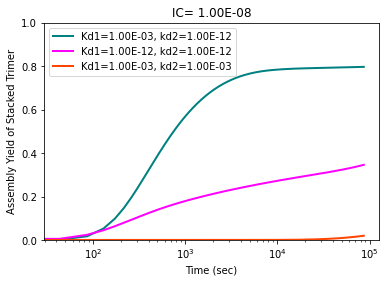

In [17]:
# ---------------------------------------------------
# --- Assembly Yield time courses ---
# ---------------------------------------------------

# --- PARAMETERS ---
# List of fixed parameters
kOn = 10**6
δ = 0 # degradation rate parameter
Q = 0 # synthesis rate parameter


# List of parameters that will be explored 
IC_1 = 1*10**-8;
kd1 = 10**-3 # binding affinity WITHIN rings (intra)
kd2 = 10**-12 # binding affinity BETWEEN rings (inter)

states_0 = [IC_1,0.0, 0.0,0.0, 0.0,0.0, 0.0,0.0, 0.0,0.0, 0.0,0.0]

# To integrate ODEs, we need a vector for time
tEnd = 86400 # 24hrs
#tEnd = 10**9 # 24hrs
t = np.linspace(0,tEnd,2000)
# Now, integrate the ODEs and put the results in \"solution\"
# --- kd1 = kd2 = 10^-9 ---
kd1_1 = kd1; kd2_1= kd2;
solution_1 = odeint(stackedTrimer,states_0,t,rtol = 1e-12, atol = 1e-12)
# --- kd1 = 10^-9 & kd2 = 10^-7 ---
kd1 = 10**-12 # binding affinity WITHIN rings (intra)
kd2 = 10**-12 # binding affinity BETWEEN rings (inter)
kd1_2 = kd1; kd2_2= kd2;
solution_2 = odeint(stackedTrimer,states_0,t,rtol = 1e-12, atol = 1e-12)
# --- kd1 = 10^-7 & kd2 = 10^-9 ---
kd1 = 10**-3 # binding affinity WITHIN rings (intra)
kd2 = 10**-3 # binding affinity BETWEEN rings (inter)
kd1_3 = kd1; kd2_3= kd2;
solution_3 = odeint(stackedTrimer,states_0,t,rtol = 1e-12, atol = 1e-12)

# Calculate the assembly yield for each time course of the 12th species
tVec = t;
xStkTrm_tps_1 = solution_1[:,-1] # the fully stacked trimer
xStkTrm_tps_2 = solution_2[:,-1]
xStkTrm_tps_3 = solution_3[:,-1]

Yn_1 = calcAY24hrs(IC_1,xStkTrm_tps_1)
Yn_2 = calcAY24hrs(IC_1,xStkTrm_tps_2)
Yn_3 = calcAY24hrs(IC_1,xStkTrm_tps_3)

# --- plot AY values --- 
ICFormat = format(IC_1,'.2E');
kd1_format_1 = format(kd1_1,'.2E');kd2_format_1 = format(kd2_1,'.2E')
kd1_format_2 = format(kd1_2,'.2E');kd2_format_2 = format(kd2_2,'.2E')
kd1_format_3 = format(kd1_3,'.2E');kd2_format_3 = format(kd2_3,'.2E')

plt.semilogx(tVec,Yn_1,'-', color = 'teal',linewidth=2)
plt.semilogx(tVec,Yn_2,'-', color = 'fuchsia',linewidth=2)
plt.semilogx(tVec,Yn_3,'-',color = 'orangered', linewidth=2)
x1,x2,y1,y2 = plt.axis(); plt.axis((x1,x2,0,1))

plt.title('IC= '+ ICFormat)
plt.xlabel('Time (sec)')
plt.ylabel('Assembly Yield of Stacked Trimer')
plt.legend(["Kd1="+kd1_format_1+", kd2=" +kd2_format_1, "Kd1="+kd1_format_2+", kd2=" +kd2_format_2, "Kd1="+kd1_format_3+", kd2=" +kd2_format_3],loc='best')
#plt.show()  

#plt.tight_layout()
plt.savefig('LL_SR_AY_01_0420.eps')

In [3]:
# ---------------------------------------------------
# --- Plot AY vs IC ---
# ---------------------------------------------------

# calculate the AY for increasing IC with various Kd2 values
# Koan's values

# --- PARAMETERS ---
# List of fixed parameters
kOn = 10**6
δ = 0 # degradation rate parameter
Q = 0 # synthesis rate parameter
# other parameters 
tEnd = 86400 # 24hrs
t = np.linspace(0,tEnd,2000)

# make vector of all IC to consider
nICpts=100;
minDeg_IC = -12; maxDeg_IC = -3;

print("Working on AY vs IC...")
# RED
# --- kd1 = 10^-3 & kd2 = 10^-12 ---
# Binding strengths
kd1 = 10**-3 
kd2 = 10**-12 
kd1_1 = kd1; kd2_1= kd2;
allAY_ICs = calcAYvsIC(minDeg_IC, maxDeg_IC, nICpts)
allICs_1 = allAY_ICs[0]; AYvsIC_1=allAY_ICs[1]
# GREEN
# --- kd1 = 10^-12 & kd2 = 10^-12 ---
kd1 = 10**-12 ; kd2 = 10**-12 
kd1_2 = kd1; kd2_2= kd2;
allAY_ICs = calcAYvsIC(minDeg_IC, maxDeg_IC, nICpts)
allICs_2 = allAY_ICs[0]; AYvsIC_2=allAY_ICs[1]
# ORANGE
# --- kd1 = 10^-8 & kd2 = 10^-8 ---
kd1 = 10**-8; kd2 = 10**-8
kd1_3 = kd1; kd2_3= kd2;
allAY_ICs = calcAYvsIC(minDeg_IC, maxDeg_IC, nICpts)
allICs_3 = allAY_ICs[0]; AYvsIC_3=allAY_ICs[1]
# BLUE
# --- kd1 = 10^-3 & kd2 = 10^-3 ---
kd1 = 10**-3; kd2 = 10**-3
kd1_4 = kd1; kd2_4= kd2;
allAY_ICs = calcAYvsIC(minDeg_IC, maxDeg_IC, nICpts)
allICs_4 = allAY_ICs[0]; AYvsIC_4=allAY_ICs[1]
# PURPLE
# --- kd1 = 10^-12 & kd2 = 10^-3 ---
kd1 = 10**-12; kd2 = 10**-3
kd1_5 = kd1; kd2_5= kd2;
allAY_ICs = calcAYvsIC(minDeg_IC, maxDeg_IC, nICpts)
allICs_5 = allAY_ICs[0]; AYvsIC_5=allAY_ICs[1]

print("Done with AY vs IC pts")

Working on AY vs IC...


/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


Done with AY vs IC pts


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


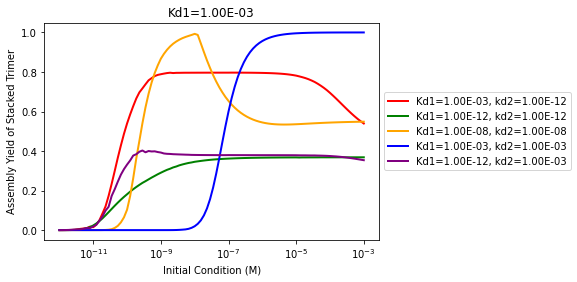

In [4]:
# --- now plot AY vs IC ---
kd1_format_1 = format(kd1_1,'.2E');kd2_format_1 = format(kd2_1,'.2E')
kd1_format_2 = format(kd1_2,'.2E');kd2_format_2 = format(kd2_2,'.2E')
kd1_format_3 = format(kd1_3,'.2E');kd2_format_3 = format(kd2_3,'.2E')
kd1_format_4 = format(kd1_4,'.2E');kd2_format_4 = format(kd2_4,'.2E')
kd1_format_5 = format(kd1_5,'.2E');kd2_format_5 = format(kd2_5,'.2E')

fig2 = plt.semilogx(allICs_1,AYvsIC_1,'r-',linewidth=2)
fig2 = plt.semilogx(allICs_2,AYvsIC_2,'g-',linewidth=2)
fig2 = plt.semilogx(allICs_3,AYvsIC_3,'-',linewidth=2, color='orange')
fig2 = plt.semilogx(allICs_4,AYvsIC_4,'b-',linewidth=2)
fig2 = plt.semilogx(allICs_5,AYvsIC_5,'-',linewidth=2, color='purple')

#plt.axis((x1,x2,0,1))
plt.title("Kd1="+kd1_format_1)
plt.xlabel('Initial Condition (M)')
plt.ylabel('Assembly Yield of Stacked Trimer')
plt.legend(["Kd1="+kd1_format_1+", kd2=" +kd2_format_1, "Kd1="+kd1_format_2+", kd2=" +kd2_format_2, "Kd1="+kd1_format_3+", kd2=" +kd2_format_3,  "Kd1="+kd1_format_4+", kd2=" +kd2_format_4, "Kd1="+kd1_format_5+", kd2=" +kd2_format_5],loc='center left', bbox_to_anchor=(1, 0.5))
#plt.show()  
#plt.tight_layout()
#plt.savefig('LL_SR_AYvsIC_KoanVals_100pts_0404.png')
plt.savefig('LL_SR_AYvsIC_n100_'+today+'.eps')

In [3]:
# ---------------------------------------------------
# --- Plot AY vs IC HEATMAP ---
# ---------------------------------------------------

# calculate the AY for increasing IC with various Kd2 values on a heatmap 

# --- PARAMETERS ---
# List of fixed parameters
kOn = 10**6
δ = 0 # degradation rate parameter
Q = 0 # synthesis rate parameter
kd1 = 10**-9
# other parameters 
tEnd = 86400 # 24hrs
t = np.linspace(0,tEnd,2000)

print("Running for fixed Kd1...")
# initializations 
nICpts=50;nKdspts=50;
minDeg_IC=-9;maxDeg_IC=-3; # IC pts
minDeg_kd=-9;maxDeg_kd=-3; # Kd pts

# start of function here!
mags_IC = np.linspace(minDeg_IC, maxDeg_IC,nICpts)
allICs = 10**mags_IC
mags_IC = np.linspace(minDeg_kd, maxDeg_kd,nKdspts)
allKd2 = 10**mags_IC

IC_kd2_AY_mat=np.zeros((nICpts,nKdspts))
# loop to solve AY for each IC 
for indIC in range(0,nICpts): # for each IC 
    icVal = allICs[indIC]
    for kd2ind in range(0,nKdspts): # for each value of kd2
        kd2_val=allKd2[kd2ind]
        IC_1=icVal; kd2 = kd2_val
        states_0 = [IC_1,0.0, 0.0,0.0, 0.0,0.0, 0.0,0.0, 0.0,0.0, 0.0,0.0]
        # Now, integrate the ODEs and put the results in \"solution\"
        solution_1 = odeint(stackedTrimer,states_0,t,rtol = 1e-12, atol = 1e-12)
        tVec = t; xStkTrm_tps_1 = solution_1[:,-1]
        # calculate AY
        Yn_1 = calcAY24hrs(IC_1,xStkTrm_tps_1)
        # store the last AY value - since tc stops at 24hrs that's the AY at 24hrs
        AY_valStr = Yn_1[-1]; 
        #print("IC= " + str(icVal) + " , Kd2= " + str(kd2_val) + " , AY= " +  str(AY_valStr))
        IC_kd2_AY_mat[kd2ind][indIC] = AY_valStr # IC on x-axis, Kd on y-axis
        
#print(IC_kd2_AY_mat)
#print("All ICs: ", allICs)
#print("All Kd2s: ", allKd2)
print("Done will all pts!")

Running for fixed Kd1...


/Users/leolagunes/opt/anaconda3/lib/python3.8/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


Done will all pts!


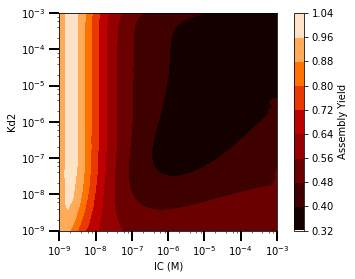

In [4]:
# Plot heatmap for AY IC vs Kd2

#AYmatPlt = np.flipud(kd1_kd2_AY_mat)
AYmatPlt = IC_kd2_AY_mat

fig, ax = plt.subplots()
# im = ax.imshow(AYmatPlt)
CS = ax.contourf(allICs, allKd2, AYmatPlt,cmap=plt.cm.gist_heat)
cbar = fig.colorbar(CS)
cbar.ax.set_ylabel('Assembly Yield')

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_aspect('equal')

# get ticks on log scale
ax.tick_params(axis="x", direction="out", length=10, width=2, color="black")
ax.tick_params(axis="y", direction="out", length=10, width=2, color="black")

locmin = matplotlib.ticker.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8),numticks=12)
ax.xaxis.set_minor_locator(locmin); ax.yaxis.set_minor_locator(locmin)
ax.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

ax.set_xlabel('IC (M)', fontsize=10)
ax.set_ylabel('Kd2', fontsize=10)

#plt.show()
# --- save figure ---
#plt.tight_layout()
plt.savefig('LL_SR_heatmap_AYvsICvsKd2_n50_'+today+'.eps')

In [7]:
# ---------------------------------------------------
# --- Plot AY vs IC HEATMAP ---
# ---------------------------------------------------

# calculate the AY for increasing IC with various Kd2 values on a heatmap 

# --- PARAMETERS ---
# List of fixed parameters
kOn = 10**6
δ = 0 # degradation rate parameter
Q = 0 # synthesis rate parameter
kd2 = 10**-9
# other parameters 
tEnd = 86400 # 24hrs
t = np.linspace(0,tEnd,2000)

print("Running for fixed Kd2...")
# initializations 
nICpts=50;nKdspts=50;
minDeg_IC=-9;maxDeg_IC=-3; # IC pts
minDeg_kd=-9;maxDeg_kd=-3; # Kd pts

# start of function here!
mags_IC = np.linspace(minDeg_IC, maxDeg_IC,nICpts)
allICs = 10**mags_IC
mags_Kd = np.linspace(minDeg_kd, maxDeg_kd,nKdspts)
allKd1 = 10**mags_Kd

IC_kd1_AY_mat=np.zeros((nICpts,nKdspts))
# loop to solve AY for each IC 
for indIC in range(0,nICpts): # for each IC 
    icVal = allICs[indIC]
    for kd1ind in range(0,nKdspts): # for each value of kd2
        kd1_val=allKd1[kd1ind]
        IC_1=icVal; kd1 = kd1_val
        states_0 = [IC_1,0.0, 0.0,0.0, 0.0,0.0, 0.0,0.0, 0.0,0.0, 0.0,0.0]
        # Now, integrate the ODEs and put the results in \"solution\"
        solution_1 = odeint(stackedTrimer,states_0,t,rtol = 1e-12, atol = 1e-12)
        tVec = t; xStkTrm_tps_1 = solution_1[:,-1]
        # calculate AY
        Yn_1 = calcAY24hrs(IC_1,xStkTrm_tps_1)
        # store the last AY value - since tc stops at 24hrs that's the AY at 24hrs
        AY_valStr = Yn_1[-1]; 
        #print("IC= " + str(icVal) + " , Kd2= " + str(kd2_val) + " , AY= " +  str(AY_valStr))
        IC_kd1_AY_mat[kd1ind][indIC] = AY_valStr # IC on x-axis, Kd on y-axis
        
#print(IC_kd2_AY_mat)
#print("All ICs: ", allICs)
#print("All Kd2s: ", allKd2)
print("Done will all pts!")

Running for fixed Kd2...
Done will all pts!


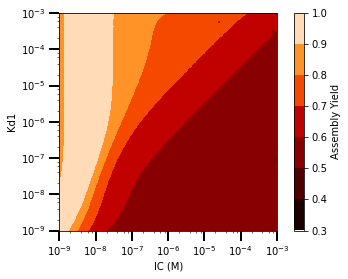

In [9]:
# Plot heatmap for AY IC vs Kd1

#AYmatPlt = np.flipud(kd1_kd2_AY_mat)
AYmatPlt = IC_kd1_AY_mat

fig, ax = plt.subplots()
# im = ax.imshow(AYmatPlt)
CS = ax.contourf(allICs, allKd1, AYmatPlt,cmap=plt.cm.gist_heat)
cbar = fig.colorbar(CS)
cbar.ax.set_ylabel('Assembly Yield')

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_aspect('equal')

# get ticks on log scale
ax.tick_params(axis="x", direction="out", length=10, width=2, color="black")
ax.tick_params(axis="y", direction="out", length=10, width=2, color="black")

locmin = matplotlib.ticker.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8),numticks=12)
ax.xaxis.set_minor_locator(locmin); ax.yaxis.set_minor_locator(locmin)
ax.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

ax.set_xlabel('IC (M)', fontsize=10)
ax.set_ylabel('Kd1', fontsize=10)

#plt.show()
# --- save figure ---
#plt.tight_layout()
plt.savefig('LL_SR_heatmap_AYvsICvsKd2_n50_'+today+'.eps')

In [114]:
# ---------------------------------------------------
# --- Plot AY vs Kd1 vs Kd2 HEATMAP ---
# ---------------------------------------------------

# calculate the AY for Kd1 vs Kd2 values on a heatmap 

# --- PARAMETERS ---
# List of fixed parameters
kOn = 10**6
δ = 0 # degradation rate parameter
Q = 0 # synthesis rate parameter
IC_val = 4*10**-6
# other parameters 
tEnd = 86400 # 24hrs
t = np.linspace(0,tEnd,2000)

print("Running for fixed IC...")
# initializations 
nKdspts=50;
minDeg_kd1=-12;maxDeg_kd1=-3; # Kd1 pts
minDeg_kd2=-12;maxDeg_kd2=-3; # Kd2 pts

# start of function here!
mags_Kd1 = np.linspace(minDeg_kd1, maxDeg_kd1,nKdspts)
allKd1 = 10**mags_Kd1
mags_Kd2 = np.linspace(minDeg_kd2, maxDeg_kd2,nKdspts)
allKd2 = 10**mags_Kd2

kd1_kd2_AY_mat=np.zeros((nKdspts,nKdspts))
# loop to solve AY for each IC 
for kd2ind in range(0,nKdspts): # for each IC 
    kd2_val=allKd2[kd2ind]; kd2 = kd2_val;
    for kd1ind in range(0,nKdspts): # for each value of kd2
        kd1_val=allKd1[kd1ind]; kd1 = kd1_val
        states_0 = [IC_val,0.0, 0.0,0.0, 0.0,0.0, 0.0,0.0, 0.0,0.0, 0.0,0.0]
        # Now, integrate the ODEs and put the results in \"solution\"
        solution_1 = odeint(stackedTrimer,states_0,t,rtol = 1e-12, atol = 1e-12)
        tVec = t; xStkTrm_tps_1 = solution_1[:,-1]
        # calculate AY
        Yn_1 = calcAY24hrs(IC_val,xStkTrm_tps_1)
        # store the last AY value - since tc stops at 24hrs that's the AY at 24hrs
        AY_valStr = Yn_1[-1]; 
        #print("IC= " + str(icVal) + " , Kd2= " + str(kd2_val) + " , AY= " +  str(AY_valStr))
        kd1_kd2_AY_mat[kd1ind][kd2ind] = AY_valStr # IC on x-axis, Kd on y-axis
        
# print(kd1_kd2_AY_mat)
#print("All ICs: ", allICs)
#print("All Kd2s: ", allKd2)
print("Done will all pts!")

Running for fixed IC...
Done will all pts!


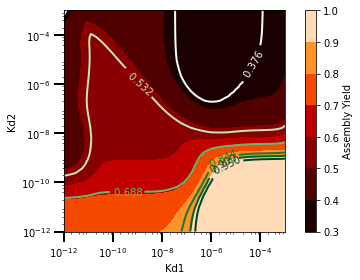

In [116]:
# Prep for plotting the heatmap

#import matplotlib.cm as cm
#from matplotlib.ticker import FormatStrFormatter
#import matplotlib
# from matplotlib.ticker import LogLocator


AYmatPlt = np.flipud(kd1_kd2_AY_mat)
#AYmatPlt = kd1_kd2_AY_mat

fig, ax = plt.subplots()
# im = ax.imshow(AYmatPlt)
CS = ax.contourf(allKd2, allKd1, AYmatPlt,cmap=plt.cm.gist_heat)
cbar = fig.colorbar(CS)
cbar.ax.set_ylabel('Assembly Yield')

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_aspect('equal')

# get ticks on log scale
ax.tick_params(axis="x", direction="out", length=10, width=2, color="black")
ax.tick_params(axis="y", direction="out", length=10, width=2, color="black")

locmin = matplotlib.ticker.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8),numticks=12)
ax.xaxis.set_minor_locator(locmin); ax.yaxis.set_minor_locator(locmin)
ax.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

ax.set_xlabel('Kd1', fontsize=10)
ax.set_ylabel('Kd2', fontsize=10)

levels = [0.376, 0.532,
                    0.688,0.844,
                    0.90,0.95
                    ]

CS = ax.contour(allKd2, allKd1, AYmatPlt, levels, 
                origin ='lower',
                cmap ='Greens',
                linewidths = 2,
                extent =(-1, 1, -1, 1))

ax.clabel(CS, levels,
          inline = 1, 
          fmt ='% 1.3f',
          fontsize = 10)

# --- save plot --- 
plt.tight_layout()
plt.savefig('LL_SR_heatmap_AYvsKd1vsKd2_n50_contours_'+today+'.eps')

In [ ]:
# --- Plot with contour lines --- 


AYmatPlt = np.flipud(kd1_kd2_AY_mat)
#AYmatPlt = kd1_kd2_AY_mat

fig, ax = plt.subplots()
# im = ax.imshow(AYmatPlt)
CS = ax.contourf(allKd2, allKd1, AYmatPlt,cmap=plt.cm.gist_heat)
cbar = fig.colorbar(CS)
cbar.ax.set_ylabel('Assembly Yield')

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_aspect('equal')

# get ticks on log scale
ax.tick_params(axis="x", direction="out", length=10, width=2, color="black")
ax.tick_params(axis="y", direction="out", length=10, width=2, color="black")

locmin = matplotlib.ticker.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8),numticks=12)
ax.xaxis.set_minor_locator(locmin); ax.yaxis.set_minor_locator(locmin)
ax.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

ax.set_xlabel('Kd1', fontsize=10)
ax.set_ylabel('Kd2', fontsize=10)

# plt.show()
# save figure
plt.tight_layout()
plt.savefig('LL_SR_heatmap_AYvsKd1vsKd2_n50_contour_'+today+'.eps')

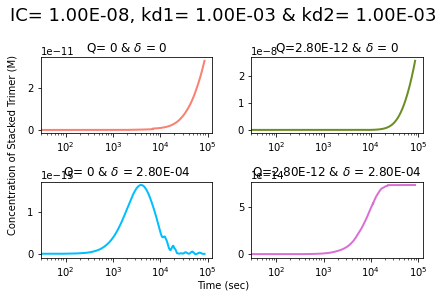

In [6]:
# ---------------------------------------------------
# --- Time course w Synth/Deg ---
# ---------------------------------------------------

# --- PARAMETERS ---
# List of fixed parameters
kOn = 10**6
IC_1 = 1*10**-8;
kd1 = 10**-3 # binding affinity WITHIN rings (intra)
kd2 = 10**-3 # binding affinity BETWEEN rings (inter)

# parameters to explore 
δ_main = 2.8*10**-4 # degradation parameter term
Q_main = IC_1*δ_main # synthesis parameter term
# parameters for integration
# To intgrate ODEs, we need a vector for time
states_0 = [IC_1,0.0, 0.0,0.0, 0.0,0.0, 0.0,0.0, 0.0,0.0, 0.0,0.0]
tEnd = 86400 # 24hrs
# tEnd = 10**7
t = np.linspace(0,tEnd,2000)

# Now, integrate the ODEs and put the results in \"solution\"
# --- no synth or deg ---
δ_1 = 0; Q_1 = 0 # synthesis rate parameter
δ = δ_1; Q = Q_1
solution_1 = odeint(stackedTrimer,states_0,t,rtol = 1e-12, atol = 1e-12)

# --- only synth --- 
δ_2 = 0; Q_2 = Q_main # synthesis rate parameter
δ = δ_2; Q = Q_2
solution_2 = odeint(stackedTrimer,states_0,t,rtol = 1e-12, atol = 1e-12)

# --- only deg --- 
δ_3 = δ_main; Q_3 = 0 # synthesis rate parameter
δ = δ_3; Q = Q_3
solution_3 = odeint(stackedTrimer,states_0,t,rtol = 1e-12, atol = 1e-12)

# --- both synth & deg --- 
δ_4 = δ_main; Q_4 = Q_main # synthesis rate parameter
δ = δ_4; Q = Q_4
solution_4 = odeint(stackedTrimer,states_0,t,rtol = 1e-12, atol = 1e-12)

# --- Plot time courses --- 

tVec = t;
xStkTrm_tps_1 = solution_1[:,-1] # the fully stacked trimer
xStkTrm_tps_2 = solution_2[:,-1]
xStkTrm_tps_3 = solution_3[:,-1]
xStkTrm_tps_4 = solution_4[:,-1]

ICFormat = format(IC_1,'.2E');
delta_val_format = format(δ_main,'.2E');Q_val_format = format(Q_main,'.2E')
kd1format = format(kd1,'.2E');kd2format = format(kd2,'.2E')

fig, axs = plt.subplots(2, 2)
axs[0, 0].semilogx(tVec,xStkTrm_tps_1,'-', color = 'salmon',linewidth=2)
axs[0, 1].semilogx(tVec,xStkTrm_tps_2,'-', color = 'olivedrab',linewidth=2)
axs[1, 0].semilogx(tVec,xStkTrm_tps_3,'-', color = 'deepskyblue',linewidth=2)
axs[1, 1].semilogx(tVec,xStkTrm_tps_4,'-', color = 'orchid',linewidth=2)

fig.suptitle('IC= '+ ICFormat+', kd1= '+ kd1format +' & kd2= '+ kd2format, fontsize=18)
axs[0, 0].set_title("Q= 0 & $\delta$ = 0")
axs[0, 1].set_title("Q="+Q_val_format+" & $\delta$ = 0")
axs[1, 0].set_title("Q= 0 & $\delta$ = "+delta_val_format)
axs[1, 1].set_title("Q="+Q_val_format+" & $\delta$ = "+delta_val_format)
#axs[1, 0].set_xlabel('Time (sec)')

fig.text(0.5, 0.005, 'Time (sec)', ha='center')
fig.text(0.001, 0.5, 'Concentration of Stacked Trimer (M)', va='center', rotation='vertical')

fig.tight_layout()
#plt.show()  

plt.savefig('synthDeg_tc_'+today+'.eps')

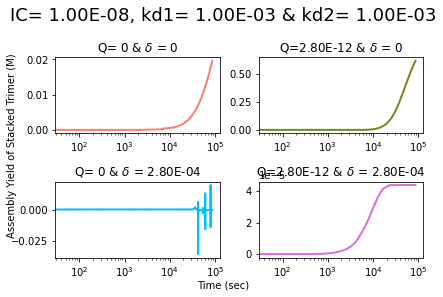

In [18]:
# ---------------------------------------------------
# --- Assembly Yield w Synth/Deg ---
# ---------------------------------------------------

# Calculate the assembly yield for each time course of the 12th species

# LL - 04/26/22

# def calcAY_synthDeg(tVec,solution_mat)
tVec = t;

Yn_1= calcAY_tc_synthDeg(tVec,solution_1); Yn_2= calcAY_tc_synthDeg(tVec,solution_2);
Yn_3= calcAY_tc_synthDeg(tVec,solution_3); Yn_4= calcAY_tc_synthDeg(tVec,solution_4);

# Now plot AY time course 
# make the above a function and save then plot multiple time courses and export the 24hr mark one!
fig, axs = plt.subplots(2, 2)
axs[0, 0].semilogx(tVec,Yn_1,'-', color = 'salmon',linewidth=2)
axs[0, 1].semilogx(tVec,Yn_2,'-', color = 'olivedrab',linewidth=2)
axs[1, 0].semilogx(tVec,Yn_3,'-', color = 'deepskyblue',linewidth=2)
axs[1, 1].semilogx(tVec,Yn_4,'-', color = 'orchid',linewidth=2)

fig.suptitle('IC= '+ ICFormat+', kd1= '+ kd1format +' & kd2= '+ kd2format, fontsize=18)
axs[0, 0].set_title("Q= 0 & $\delta$ = 0")
axs[0, 1].set_title("Q="+Q_val_format+" & $\delta$ = 0")
axs[1, 0].set_title("Q= 0 & $\delta$ = "+delta_val_format)
axs[1, 1].set_title("Q="+Q_val_format+" & $\delta$ = "+delta_val_format)
#axs[1, 0].set_xlabel('Time (sec)')

fig.text(0.5, 0.005, 'Time (sec)', ha='center')
fig.text(0.001, 0.5, 'Assembly Yield of Stacked Trimer (M)', va='center', rotation='vertical')

fig.tight_layout()
#plt.show()  

plt.savefig('AY_synthDeg_tc_'+today+'.eps')

#plt.savefig('LL_SR_AY_tc_synthDeg_'+today+'.eps')

In [138]:
# ---------------------------------------------------
# --- Assembly Yield w Synth/Deg at 24hrs---
# ---------------------------------------------------
# --- PARAMETERS ---
# List of fixed parameters
kOn = 10**6
δ_main = 2.8*10**-4 # degradation parameter term
δ = δ_main
kd1 = 10**-12; kd2 = 10**-3
# other parameters 
tEnd = 86400 # 24hrs
t = np.linspace(0,tEnd,2000)
IC = 10**-12
Q = IC*δ; #print(Q)
# calculate the AY at 24hrs 
# just a single example 
Yn_1= calcAY_synthDeg2hrs(tVec,solution_1);
print(Yn_1)


0.019601984674251824


Working on AY vs IC...
Done with AY vs IC pts


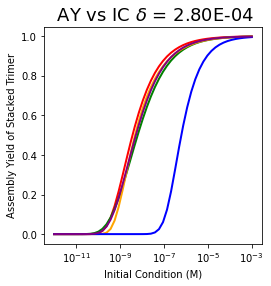

In [139]:
# ----------------------------------------------------
# --- Assembly Yield w Synth/Deg at 24hrs AY vs IC ---
# ----------------------------------------------------

# calculate AY vs IC 

# --- PARAMETERS ---
# List of fixed parameters
kOn = 10**6
δ_main = 2.8*10**-4 # degradation parameter term
δ = δ_main
# other parameters 
tEnd = 86400 # 24hrs
t = np.linspace(0,tEnd,2000)

# make vector of all IC to consider
nICpts=50;
minDeg_IC = -12; maxDeg_IC = -3;

print("Working on AY vs IC...")

# RED
# --- kd1 = 10^-3 & kd2 = 10^-12 ---
# Binding strengths
kd1 = 10**-3 ; kd2 = 10**-12 
kd1_1 = kd1; kd2_1= kd2; 
allAY_ICs = calc_AYvsIC_synthDeg(minDeg_IC, maxDeg_IC, nICpts)
allICs_1 = allAY_ICs[0]; AYvsIC_1=allAY_ICs[1]
# GREEN
# --- kd1 = 10^-12 & kd2 = 10^-12 ---
kd1 = 10**-12 ; kd2 = 10**-12 
kd1_2 = kd1; kd2_2= kd2;
allAY_ICs = calc_AYvsIC_synthDeg(minDeg_IC, maxDeg_IC, nICpts)
allICs_2 = allAY_ICs[0]; AYvsIC_2=allAY_ICs[1]
# ORANGE
# --- kd1 = 10^-8 & kd2 = 10^-8 ---
kd1 = 10**-8; kd2 = 10**-8
kd1_3 = kd1; kd2_3= kd2;
allAY_ICs = calc_AYvsIC_synthDeg(minDeg_IC, maxDeg_IC, nICpts)
allICs_3 = allAY_ICs[0]; AYvsIC_3=allAY_ICs[1]
# BLUE
# --- kd1 = 10^-3 & kd2 = 10^-3 ---
kd1 = 10**-3; kd2 = 10**-3
kd1_4 = kd1; kd2_4= kd2;
allAY_ICs = calc_AYvsIC_synthDeg(minDeg_IC, maxDeg_IC, nICpts)
allICs_4 = allAY_ICs[0]; AYvsIC_4=allAY_ICs[1]
# PURPLE
# --- kd1 = 10^-12 & kd2 = 10^-3 ---
kd1 = 10**-12; kd2 = 10**-3
kd1_5 = kd1; kd2_5= kd2;
allAY_ICs = calc_AYvsIC_synthDeg(minDeg_IC, maxDeg_IC, nICpts)
allICs_5 = allAY_ICs[0]; AYvsIC_5=allAY_ICs[1]

print("Done with AY vs IC pts")

# Now plot curve
delta_val_format = format(δ_main,'.2E');
kd1_format_1 = format(kd1_1,'.2E');kd2_format_1 = format(kd2_1,'.2E')
kd1_format_2 = format(kd1_2,'.2E');kd2_format_2 = format(kd2_2,'.2E')
kd1_format_3 = format(kd1_3,'.2E');kd2_format_3 = format(kd2_3,'.2E')
kd1_format_4 = format(kd1_4,'.2E');kd2_format_4 = format(kd2_4,'.2E')
kd1_format_5 = format(kd1_5,'.2E');kd2_format_5 = format(kd2_5,'.2E')

fig = plt.figure()
ax = fig.add_subplot(111)

fig2 = plt.semilogx(allICs_1,AYvsIC_1,'r-',linewidth=2)
fig2 = plt.semilogx(allICs_2,AYvsIC_2,'g-',linewidth=2)
fig2 = plt.semilogx(allICs_3,AYvsIC_3,'-',linewidth=2, color='orange')
fig2 = plt.semilogx(allICs_4,AYvsIC_4,'b-',linewidth=2)
fig2 = plt.semilogx(allICs_5,AYvsIC_5,'-',linewidth=2, color='purple')

#plt.axis((x1,x2,0,1))
plt.title( " AY vs IC $\delta$ = " +delta_val_format, fontsize=18)
plt.xlabel('Initial Condition (M)')
plt.ylabel('Assembly Yield of Stacked Trimer')
#plt.legend(["Kd1="+kd1_format_1+", kd2=" +kd2_format_1, "Kd1="+kd1_format_2+", kd2=" +kd2_format_2, "Kd1="+kd1_format_3+", kd2=" +kd2_format_3,  "Kd1="+kd1_format_4+", kd2=" +kd2_format_4, "Kd1="+kd1_format_5+", kd2=" +kd2_format_5],loc='center left', bbox_to_anchor=(1, 0.5))
#plt.show()  
#plt.tight_layout()
ax.set_aspect(1./ax.get_data_ratio())
plt.savefig('LL_SR_AYvsIC_sd_'+today+'.eps')
 



Running for fixed Kd1...
Done will all pts!


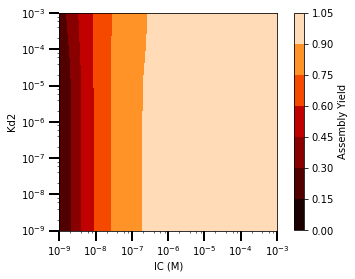

In [39]:
# ----------------------------------------------------
# --- Assembly Yield w Synth/Deg at 24hrs AY vs IC ---
# ----------------------------------------------------

# calculate AY vs IC - HEATMAPS
# List of fixed parameters
kOn = 10**6
δ_main = 2.8*10**-4 # degradation parameter term
δ = δ_main
# global kd2
# other parameters 
tEnd = 86400 # 24hrs
t = np.linspace(0,tEnd,2000)
kd1 = 10**-8

print("Running for fixed Kd1...")
# initializations 
nICpts=50;
nKdspts=nICpts;
minDeg_IC=-9;maxDeg_IC=-3; # IC pts
minDeg_kd=-9;maxDeg_kd=-3; # Kd pts

# start of function here!
mags_IC = np.linspace(minDeg_IC, maxDeg_IC,nICpts)
allICs = 10**mags_IC
mags_IC = np.linspace(minDeg_kd, maxDeg_kd,nKdspts)
allKd2 = 10**mags_IC
# print("kd2's: ", allKd2)

IC_kd2_AY_mat=np.zeros((nICpts,nKdspts))

for kd2Ind in range(0, nKdspts): # for each kd2 values
    # define the parameters
    kd2_val = allKd2[kd2Ind];kd2 = kd2_val; #print(kd2)
    # calc AY for all IC's
    allAY_ICs = calc_AYvsIC_synthDeg(minDeg_IC, maxDeg_IC, nICpts); #print(allAY_ICs[1])
    AY_vals_ic = allAY_ICs[1];
    # store AY values
    IC_kd2_AY_mat[kd2Ind] = AY_vals_ic 

print("Done will all pts!")

# --- PLOT HEATMAP ---
# Plot heatmap for AY IC vs Kd2
AYmatPlt = np.flipud(IC_kd2_AY_mat)
#AYmatPlt = IC_kd2_AY_mat

fig, ax = plt.subplots()
# im = ax.imshow(AYmatPlt)
CS = ax.contourf(allICs, allKd2, AYmatPlt,cmap=plt.cm.gist_heat)
cbar = fig.colorbar(CS)
cbar.ax.set_ylabel('Assembly Yield')

ax.set_xscale('log');ax.set_yscale('log')
ax.set_aspect('equal')

# get ticks on log scale
ax.tick_params(axis="x", direction="out", length=10, width=2, color="black")
ax.tick_params(axis="y", direction="out", length=10, width=2, color="black")

locmin = matplotlib.ticker.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8),numticks=12)
ax.xaxis.set_minor_locator(locmin); ax.yaxis.set_minor_locator(locmin)
ax.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

ax.set_xlabel('IC (M)', fontsize=10); ax.set_ylabel('Kd2', fontsize=10)

#plt.show()
# --- save figure ---
#plt.tight_layout()
plt.savefig('LL_SR_heatmap_AYvsICvsKd2_n50_'+today+'.eps')

Running for fixed Kd1...
Done will all pts!


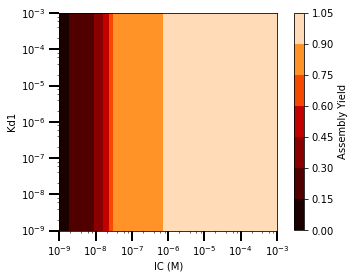

In [45]:
# ----------------------------------------------------
# --- Assembly Yield w Synth/Deg at 24hrs AY vs IC ---
# ----------------------------------------------------

# calculate AY vs IC - HEATMAPS
# List of fixed parameters
kOn = 10**6
δ_main = 2.8*10**-4 # degradation parameter term
δ = δ_main
# global kd2
# other parameters 
tEnd = 86400 # 24hrs
t = np.linspace(0,tEnd,2000)
kd2 = 10**-8

print("Running for fixed Kd1...")
# initializations 
nICpts=5;
nKdspts=nICpts;
minDeg_IC=-9;maxDeg_IC=-3; # IC pts
minDeg_kd=-9;maxDeg_kd=-3; # Kd pts

# start of function here!
mags_IC = np.linspace(minDeg_IC, maxDeg_IC,nICpts)
allICs = 10**mags_IC
mags_IC = np.linspace(minDeg_kd, maxDeg_kd,nKdspts)
allKd1 = 10**mags_IC
# print("kd2's: ", allKd2)

IC_kd1_AY_mat=np.zeros((nICpts,nKdspts))

for kd1Ind in range(0, nKdspts): # for each kd2 values
    # define the parameters
    kd1_val = allKd1[kd1Ind];kd2 = kd2_val; #print(kd2)
    # calc AY for all IC's
    allAY_ICs = calc_AYvsIC_synthDeg(minDeg_IC, maxDeg_IC, nICpts); #print(allAY_ICs[1])
    AY_vals_ic = allAY_ICs[1];
    # store AY values
    IC_kd1_AY_mat[kd1Ind] = AY_vals_ic 

print("Done will all pts!")

# --- PLOT HEATMAP ---
# Plot heatmap for AY IC vs Kd2
AYmatPlt = np.flipud(IC_kd1_AY_mat)
#AYmatPlt = IC_kd2_AY_mat

fig, ax = plt.subplots()
# im = ax.imshow(AYmatPlt)
CS = ax.contourf(allICs, allKd1, AYmatPlt,cmap=plt.cm.gist_heat)
cbar = fig.colorbar(CS)
cbar.ax.set_ylabel('Assembly Yield')

ax.set_xscale('log');ax.set_yscale('log')
ax.set_aspect('equal')

# get ticks on log scale
ax.tick_params(axis="x", direction="out", length=10, width=2, color="black")
ax.tick_params(axis="y", direction="out", length=10, width=2, color="black")

locmin = matplotlib.ticker.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8),numticks=12)
ax.xaxis.set_minor_locator(locmin); ax.yaxis.set_minor_locator(locmin)
ax.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

ax.set_xlabel('IC (M)', fontsize=10); ax.set_ylabel('Kd1', fontsize=10)

#plt.show()
# --- save figure ---
#plt.tight_layout()
plt.savefig('LL_SR_heatmap_AYvsICvsKd1_n50_'+today+'.eps')

In [45]:
# ---------------------------------------------------
# --- Plot AY vs Kd1 vs Kd2 HEATMAP ---
# ---------------------------------------------------

# calculate the AY for Kd1 vs Kd2 values on a heatmap 

# --- PARAMETERS ---
# List of fixed parameters
kOn = 10**6
δ_main = 2.8*10**-4 # degradation parameter term
δ = δ_main # synthesis parameter
IC_val = 4*10**-6
Q = IC_val*δ
# other parameters 
tEnd = 86400 # 24hrs
t = np.linspace(0,tEnd,2000)

print("Running for fixed IC...")
# initializations 
nKdspts=50;
minDeg_kd1=-12;maxDeg_kd1=-3; # Kd1 pts
minDeg_kd2=-12;maxDeg_kd2=-3; # Kd2 pts

# start of function here!
mags_Kd1 = np.linspace(minDeg_kd1, maxDeg_kd1,nKdspts)
allKd1 = 10**mags_Kd1
mags_Kd2 = np.linspace(minDeg_kd2, maxDeg_kd2,nKdspts)
allKd2 = 10**mags_Kd2

kd1_kd2_AY_mat=np.zeros((nKdspts,nKdspts))
# loop to solve AY for each IC 
for kd2ind in range(0,nKdspts): # for each IC 
    kd2_val=allKd2[kd2ind]; kd2 = kd2_val;
    for kd1ind in range(0,nKdspts): # for each value of kd2
        kd1_val=allKd1[kd1ind]; kd1 = kd1_val
        states_0 = [IC_val,0.0, 0.0,0.0, 0.0,0.0, 0.0,0.0, 0.0,0.0, 0.0,0.0]
        # Now, integrate the ODEs and put the results in \"solution\"
        solution_1 = odeint(stackedTrimer,states_0,t,rtol = 1e-12, atol = 1e-12)
        tVec = t; xStkTrm_tps_1 = solution_1[:,-1]
        # calculate AY
        Yn_1 = calcAY_synthDeg2hrs(tVec,solution_1);
        # store the last AY value - since tc stops at 24hrs that's the AY at 24hrs
        #AY_valStr = Yn_1[-1]; 
        AY_valStr = Yn_1;
        #print("IC= " + str(icVal) + " , Kd2= " + str(kd2_val) + " , AY= " +  str(AY_valStr))
        #kd1_kd2_AY_mat[kd1ind][kd2ind] = AY_valStr # IC on x-axis, Kd on y-axis
        kd1_kd2_AY_mat[kd2ind][kd1ind] = AY_valStr
        
print("Done will all pts!")
#print(kd1_kd2_AY_mat)

Running for fixed IC...
Done will all pts!


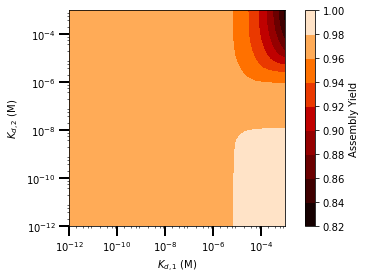

In [48]:
# --- plot heatmaps --- 
# Prep for plotting the heatmap

#AYmatPlt = np.flipud(kd1_kd2_AY_mat)
#AYmatPlt = np.fliplr(np.flipud(kd1_kd2_AY_mat))
AYmatPlt=kd1_kd2_AY_mat

fig, ax = plt.subplots()
# im = ax.imshow(AYmatPlt)
CS = ax.contourf(allKd2, allKd1, AYmatPlt,cmap=plt.cm.gist_heat)
cbar = fig.colorbar(CS)
cbar.ax.set_ylabel('Assembly Yield')

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_aspect('equal')

# get ticks on log scale
ax.tick_params(axis="x", direction="out", length=10, width=2, color="black")
ax.tick_params(axis="y", direction="out", length=10, width=2, color="black")

locmin = matplotlib.ticker.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8),numticks=12)
ax.xaxis.set_minor_locator(locmin); ax.yaxis.set_minor_locator(locmin)
ax.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

ax.set_xlabel('$K_{d,1}$ (M)', fontsize=10)
ax.set_ylabel('$K_{d,2}$ (M)', fontsize=10)

# plt.show()
# save figure
plt.tight_layout()
plt.savefig('LL_SR_heatmap_AYvsKd1vsKd2_n50_synthDeg_KDic_'+today+'.eps')

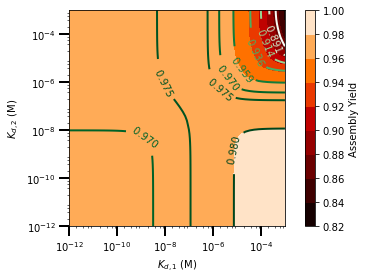

In [49]:
# ---------------------------------------------------
# --- Plot AY vs Kd1 vs Kd2 HEATMAP w contours ---
# ---------------------------------------------------

AYmatPlt=kd1_kd2_AY_mat

fig, ax = plt.subplots()
# im = ax.imshow(AYmatPlt)
CS = ax.contourf(allKd2, allKd1, AYmatPlt,cmap=plt.cm.gist_heat) 

cbar = fig.colorbar(CS)
cbar.ax.set_ylabel('Assembly Yield')

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_aspect('equal')

# get ticks on log scale
ax.tick_params(axis="x", direction="out", length=10, width=2, color="black")
ax.tick_params(axis="y", direction="out", length=10, width=2, color="black")

locmin = matplotlib.ticker.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8),numticks=12)
ax.xaxis.set_minor_locator(locmin); ax.yaxis.set_minor_locator(locmin)
ax.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

ax.set_xlabel('$K_{d,1}$ (M)', fontsize=10)
ax.set_ylabel('$K_{d,2}$ (M)', fontsize=10)


levels = [0.869, 0.891,
                    0.914,0.936,
                    0.959,0.97,
                    0.975, 0.98 #1.00
                    ]

CS = ax.contour(allKd2, allKd1, AYmatPlt, levels, 
                origin ='lower',
                cmap ='Greens',
                linewidths = 2,
                extent =(-1, 1, -1, 1))

ax.clabel(CS, levels,
          inline = 1, 
          fmt ='% 1.3f',
          fontsize = 10)

# --- save plot --- 
plt.tight_layout()
plt.savefig('LL_SR_heatmap_AYvsKd1vsKd2_synthDeg_contours_'+today+'.eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


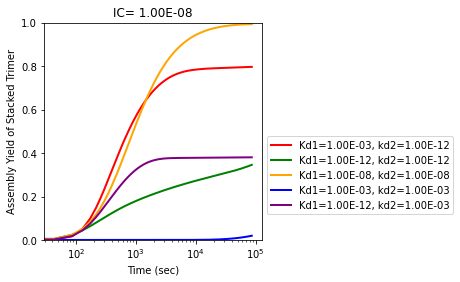

In [27]:
# ---------------------------------------------------
# --- Assembly Yield time courses no synth/deg---
# ---------------------------------------------------

# --- PARAMETERS ---
# List of fixed parameters
kOn = 10**6
δ = 0 # degradation rate parameter
Q = 0 # synthesis rate parameter

# tols for solver 
rtolVal = 1e-12; atolVal = rtolVal
# List of parameters that will be explored 
#IC_1 = 4*10**-6;
IC_1 =1*10**-8
#IC_1 = 4*10**-6;

states_0 = [IC_1,0.0, 0.0,0.0, 0.0,0.0, 0.0,0.0, 0.0,0.0, 0.0,0.0]

# To integrate ODEs, we need a vector for time
tEnd = 86400 # 24hrs
#tEnd = 10**6 # 24hrs
t = np.linspace(0,tEnd,2000)
# Now, integrate the ODEs and put the results in \"solution\"
# --- red ---
# --- kd1 = 10^-3, kd2 = 10^-12 ---
kd1 = 10**-3 # binding affinity WITHIN rings (intra)
kd2 = 10**-12 # binding affinity BETWEEN rings (inter)
kd1_1 = kd1; kd2_1= kd2;
solution_1 = odeint(stackedTrimer,states_0,t,rtol = rtolVal, atol = atolVal)
# --- green ---
# --- kd1 = 10^-9 & kd2 = 10^-7 ---
kd1 = 10**-12 # binding affinity WITHIN rings (intra)
kd2 = 10**-12 # binding affinity BETWEEN rings (inter)
kd1_2 = kd1; kd2_2= kd2;
solution_2 = odeint(stackedTrimer,states_0,t,rtol = rtolVal, atol = atolVal)
# --- orange ---
# --- kd1 = 10^-8 & kd2 = 10^-8 ---
kd1 = 10**-8 # binding affinity WITHIN rings (intra)
kd2 = 10**-8 # binding affinity BETWEEN rings (inter)
kd1_3 = kd1; kd2_3= kd2;
solution_3 = odeint(stackedTrimer,states_0,t,rtol = rtolVal, atol = atolVal)
# --- blue ---
# --- kd1 = 10^-3 & kd2 = 10^-3 ---
kd1 = 10**-3 # binding affinity WITHIN rings (intra)
kd2 = 10**-3 # binding affinity BETWEEN rings (inter)
kd1_4 = kd1; kd2_4= kd2;
solution_4 = odeint(stackedTrimer,states_0,t,rtol = rtolVal, atol = atolVal)
# --- purple ---
# --- kd1 = 10^-12 & kd2 = 10^-3 ---
kd1 = 10**-12 # binding affinity WITHIN rings (intra)
kd2 = 10**-3 # binding affinity BETWEEN rings (inter)
kd1_5 = kd1; kd2_5= kd2;
solution_5 = odeint(stackedTrimer,states_0,t,rtol = rtolVal, atol = atolVal)

# Calculate the assembly yield for each time course of the 12th species
tVec = t;
xStkTrm_tps_1 = solution_1[:,-1] # the fully stacked trimer
xStkTrm_tps_2 = solution_2[:,-1]
xStkTrm_tps_3 = solution_3[:,-1]
xStkTrm_tps_4 = solution_4[:,-1]
xStkTrm_tps_5 = solution_5[:,-1]

Yn_1 = calcAY24hrs(IC_1,xStkTrm_tps_1)
Yn_2 = calcAY24hrs(IC_1,xStkTrm_tps_2)
Yn_3 = calcAY24hrs(IC_1,xStkTrm_tps_3)
Yn_4 = calcAY24hrs(IC_1,xStkTrm_tps_4)
Yn_5 = calcAY24hrs(IC_1,xStkTrm_tps_5)

# --- plot AY values --- 
ICFormat = format(IC_1,'.2E');
kd1_format_1 = format(kd1_1,'.2E');kd2_format_1 = format(kd2_1,'.2E')
kd1_format_2 = format(kd1_2,'.2E');kd2_format_2 = format(kd2_2,'.2E')
kd1_format_3 = format(kd1_3,'.2E');kd2_format_3 = format(kd2_3,'.2E')
kd1_format_4 = format(kd1_4,'.2E');kd2_format_4 = format(kd2_4,'.2E')
kd1_format_5 = format(kd1_5,'.2E');kd2_format_5 = format(kd2_5,'.2E')

fig = plt.figure()
ax = fig.add_subplot(111)

plt.semilogx(tVec,Yn_1,'-', color = 'red',linewidth=2)
plt.semilogx(tVec,Yn_2,'-', color = 'green',linewidth=2)
plt.semilogx(tVec,Yn_3,'-', color = 'orange', linewidth=2)
plt.semilogx(tVec,Yn_4,'-', color = 'blue', linewidth=2)
plt.semilogx(tVec,Yn_5,'-', color = 'purple', linewidth=2)
x1,x2,y1,y2 = plt.axis(); plt.axis((x1,x2,0,1))

plt.title('IC= '+ ICFormat)
plt.xlabel('Time (sec)')
plt.ylabel('Assembly Yield of Stacked Trimer')
plt.legend(["Kd1="+kd1_format_1+", kd2=" +kd2_format_1, 
            "Kd1="+kd1_format_2+", kd2=" +kd2_format_2, 
            "Kd1="+kd1_format_3+", kd2=" +kd2_format_3,
            "Kd1="+kd1_format_4+", kd2=" +kd2_format_4,
            "Kd1="+kd1_format_5+", kd2=" +kd2_format_5],bbox_to_anchor=(1, 0.5))
#plt.show()  
#plt.tight_layout()
ax.set_aspect(1./ax.get_data_ratio())
plt.savefig('LL_SR_AY_tc_noSD_lngT_'+today+'.eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


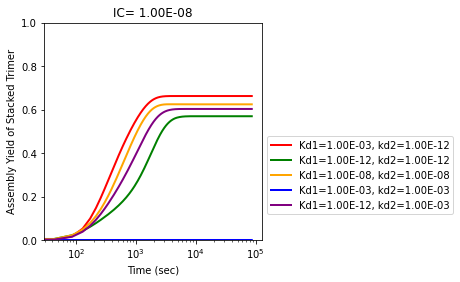

In [22]:
# ---------------------------------------------------
# --- Assembly Yield time courses w synth/deg---
# ---------------------------------------------------

# --- PARAMETERS ---
# List of fixed parameters
kOn = 10**6
IC_1 = 1*10**-8;
#IC_1 = 4*10**-6;

δ = 2.8*10**-4 # degradation parameter term
Q = IC_1*δ;

# tols for solver 
rtolVal = 1e-12; atolVal = rtolVal

states_0 = [IC_1,0.0, 0.0,0.0, 0.0,0.0, 0.0,0.0, 0.0,0.0, 0.0,0.0]

# To integrate ODEs, we need a vector for time
tEnd = 86400 # 24hrs
#tEnd = 10**8 # 24hrs
t = np.linspace(0,tEnd,2000)
# Now, integrate the ODEs and put the results in \"solution\"
# --- red ---
# --- kd1 = 10^-3, kd2 = 10^-12 ---
kd1 = 10**-3 # binding affinity WITHIN rings (intra)
kd2 = 10**-12 # binding affinity BETWEEN rings (inter)
kd1_1 = kd1; kd2_1= kd2;
solution_1 = odeint(stackedTrimer,states_0,t,rtol = rtolVal, atol = atolVal)
# --- green ---
# --- kd1 = 10^-9 & kd2 = 10^-7 ---
kd1 = 10**-12 # binding affinity WITHIN rings (intra)
kd2 = 10**-12 # binding affinity BETWEEN rings (inter)
kd1_2 = kd1; kd2_2= kd2;
solution_2 = odeint(stackedTrimer,states_0,t,rtol = rtolVal, atol = atolVal)
# --- orange ---
# --- kd1 = 10^-8 & kd2 = 10^-8 ---
kd1 = 10**-8 # binding affinity WITHIN rings (intra)
kd2 = 10**-8 # binding affinity BETWEEN rings (inter)
kd1_3 = kd1; kd2_3= kd2;
solution_3 = odeint(stackedTrimer,states_0,t,rtol = rtolVal, atol = atolVal)
# --- blue ---
# --- kd1 = 10^-3 & kd2 = 10^-3 ---
kd1 = 10**-3 # binding affinity WITHIN rings (intra)
kd2 = 10**-3 # binding affinity BETWEEN rings (inter)
kd1_4 = kd1; kd2_4= kd2;
solution_4 = odeint(stackedTrimer,states_0,t,rtol = rtolVal, atol = atolVal)
# --- purple ---
# --- kd1 = 10^-12 & kd2 = 10^-3 ---
kd1 = 10**-12 # binding affinity WITHIN rings (intra)
kd2 = 10**-3 # binding affinity BETWEEN rings (inter)
kd1_5 = kd1; kd2_5= kd2;
solution_5 = odeint(stackedTrimer,states_0,t,rtol = rtolVal, atol = atolVal)

# Calculate the assembly yield for each time course of the 12th species
# since we have synth/deg, different function to call!!
tVec = t;
Yn_1 = calcAY_tc_synthDeg(tVec,solution_1)
Yn_2 = calcAY_tc_synthDeg(tVec,solution_2)
Yn_3 = calcAY_tc_synthDeg(tVec,solution_3)
Yn_4 = calcAY_tc_synthDeg(tVec,solution_4)
Yn_5 = calcAY_tc_synthDeg(tVec,solution_5)

# --- plot AY values --- 
ICFormat = format(IC_1,'.2E');
kd1_format_1 = format(kd1_1,'.2E');kd2_format_1 = format(kd2_1,'.2E')
kd1_format_2 = format(kd1_2,'.2E');kd2_format_2 = format(kd2_2,'.2E')
kd1_format_3 = format(kd1_3,'.2E');kd2_format_3 = format(kd2_3,'.2E')
kd1_format_4 = format(kd1_4,'.2E');kd2_format_4 = format(kd2_4,'.2E')
kd1_format_5 = format(kd1_5,'.2E');kd2_format_5 = format(kd2_5,'.2E')

fig = plt.figure()
ax = fig.add_subplot(111)

plt.semilogx(tVec,Yn_1,'-', color = 'red',linewidth=2)
plt.semilogx(tVec,Yn_2,'-', color = 'green',linewidth=2)
plt.semilogx(tVec,Yn_3,'-', color = 'orange', linewidth=2)
plt.semilogx(tVec,Yn_4,'-', color = 'blue', linewidth=2)
plt.semilogx(tVec,Yn_5,'-', color = 'purple', linewidth=2)
x1,x2,y1,y2 = plt.axis(); plt.axis((x1,x2,0,1))

plt.title('IC= '+ ICFormat)
plt.xlabel('Time (sec)')
plt.ylabel('Assembly Yield of Stacked Trimer')
plt.legend(["Kd1="+kd1_format_1+", kd2=" +kd2_format_1, 
            "Kd1="+kd1_format_2+", kd2=" +kd2_format_2, 
            "Kd1="+kd1_format_3+", kd2=" +kd2_format_3,
            "Kd1="+kd1_format_4+", kd2=" +kd2_format_4,
            "Kd1="+kd1_format_5+", kd2=" +kd2_format_5],bbox_to_anchor=(1, 0.5))
#plt.show()  
#plt.tight_layout()
ax.set_aspect(1./ax.get_data_ratio())
plt.savefig('LL_SR_AY_tc_wSD_'+today+'.eps')

Working on AY vs IC...


/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Done with AY vs IC pts


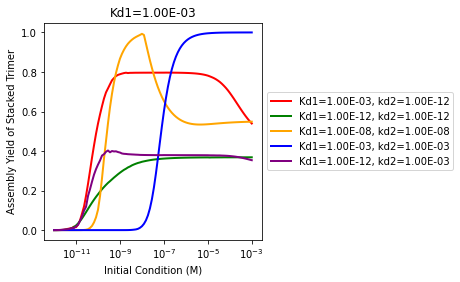

In [140]:
# ---------------------------------------------------
# --- Plot AY vs IC no synth/deg---
# ---------------------------------------------------

# calculate the AY for increasing IC with various Kd2 values
# Koan's values

# --- PARAMETERS ---
# List of fixed parameters
kOn = 10**6
δ = 0 # degradation rate parameter
Q = 0 # synthesis rate parameter
# other parameters 
tEnd = 86400 # 24hrs
t = np.linspace(0,tEnd,2000)

# make vector of all IC to consider
nICpts=100;
minDeg_IC = -12; maxDeg_IC = -3;

print("Working on AY vs IC...")
# RED
# --- kd1 = 10^-3 & kd2 = 10^-12 ---
# Binding strengths
kd1 = 10**-3 
kd2 = 10**-12 
kd1_1 = kd1; kd2_1= kd2;
allAY_ICs = calcAYvsIC(minDeg_IC, maxDeg_IC, nICpts)
allICs_1 = allAY_ICs[0]; AYvsIC_1=allAY_ICs[1]
# GREEN
# --- kd1 = 10^-12 & kd2 = 10^-12 ---
kd1 = 10**-12 ; kd2 = 10**-12 
kd1_2 = kd1; kd2_2= kd2;
allAY_ICs = calcAYvsIC(minDeg_IC, maxDeg_IC, nICpts)
allICs_2 = allAY_ICs[0]; AYvsIC_2=allAY_ICs[1]
# ORANGE
# --- kd1 = 10^-8 & kd2 = 10^-8 ---
kd1 = 10**-8; kd2 = 10**-8
kd1_3 = kd1; kd2_3= kd2;
allAY_ICs = calcAYvsIC(minDeg_IC, maxDeg_IC, nICpts)
allICs_3 = allAY_ICs[0]; AYvsIC_3=allAY_ICs[1]
# BLUE
# --- kd1 = 10^-3 & kd2 = 10^-3 ---
kd1 = 10**-3; kd2 = 10**-3
kd1_4 = kd1; kd2_4= kd2;
allAY_ICs = calcAYvsIC(minDeg_IC, maxDeg_IC, nICpts)
allICs_4 = allAY_ICs[0]; AYvsIC_4=allAY_ICs[1]
# PURPLE
# --- kd1 = 10^-12 & kd2 = 10^-3 ---
kd1 = 10**-12; kd2 = 10**-3
kd1_5 = kd1; kd2_5= kd2;
allAY_ICs = calcAYvsIC(minDeg_IC, maxDeg_IC, nICpts)
allICs_5 = allAY_ICs[0]; AYvsIC_5=allAY_ICs[1]

print("Done with AY vs IC pts")

# --- now plot AY vs IC ---
kd1_format_1 = format(kd1_1,'.2E');kd2_format_1 = format(kd2_1,'.2E')
kd1_format_2 = format(kd1_2,'.2E');kd2_format_2 = format(kd2_2,'.2E')
kd1_format_3 = format(kd1_3,'.2E');kd2_format_3 = format(kd2_3,'.2E')
kd1_format_4 = format(kd1_4,'.2E');kd2_format_4 = format(kd2_4,'.2E')
kd1_format_5 = format(kd1_5,'.2E');kd2_format_5 = format(kd2_5,'.2E')

fig = plt.figure()
ax = fig.add_subplot(111)

fig2 = plt.semilogx(allICs_1,AYvsIC_1,'r-',linewidth=2)
fig2 = plt.semilogx(allICs_2,AYvsIC_2,'g-',linewidth=2)
fig2 = plt.semilogx(allICs_3,AYvsIC_3,'-',linewidth=2, color='orange')
fig2 = plt.semilogx(allICs_4,AYvsIC_4,'b-',linewidth=2)
fig2 = plt.semilogx(allICs_5,AYvsIC_5,'-',linewidth=2, color='purple')

plt.title("Kd1="+kd1_format_1)
plt.xlabel('Initial Condition (M)')
plt.ylabel('Assembly Yield of Stacked Trimer')
plt.legend(["Kd1="+kd1_format_1+", kd2=" +kd2_format_1, 
            "Kd1="+kd1_format_2+", kd2=" +kd2_format_2, 
            "Kd1="+kd1_format_3+", kd2=" +kd2_format_3,  
            "Kd1="+kd1_format_4+", kd2=" +kd2_format_4, 
            "Kd1="+kd1_format_5+", kd2=" +kd2_format_5],loc='center left', bbox_to_anchor=(1, 0.5))

ax.set_aspect(1./ax.get_data_ratio())
plt.savefig('LL_SR_AYvsIC_n100_'+today+'.eps')